# TF Beginner MNIST   


# 1. Get MNIST DATA


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print("TF v:", tf.__version__)
import random

mnist = tf.keras.datasets.mnist
# 0-255
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

2023-09-13 09:53:11.521154: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TF v: 2.13.0


# 2. Build model architecture


In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation="relu"), #rectified linear unit. negative values are set to 0, positive values remain
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10) # numbers to 10
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer="adam",
    loss=loss_fn,
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs=5)
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2952 - accuracy: 0.9143
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1432 - accuracy: 0.9578
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1095 - accuracy: 0.9662
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0866 - accuracy: 0.9726
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0721 - accuracy: 0.9773


1/1 [==============================] - 0s 29ms/step
[[-10.161626   -5.5056624   0.680524    1.4131026  -3.9656196  -2.360454
   -9.866847   -7.974374    9.740756   -0.7677263]]
tf.Tensor(
[[2.27161689e-09 2.38998126e-07 1.16150455e-04 2.41643764e-04
  1.11487623e-06 5.55061570e-06 3.05039372e-09 2.02416821e-08
  9.99607980e-01 2.72931702e-05]], shape=(1, 10), dtype=float32)
prob: [[2.27161689e-09 2.38998126e-07 1.16150455e-04 2.41643764e-04
  1.11487623e-06 5.55061570e-06 3.05039372e-09 2.02416821e-08
  9.99607980e-01 2.72931702e-05]]


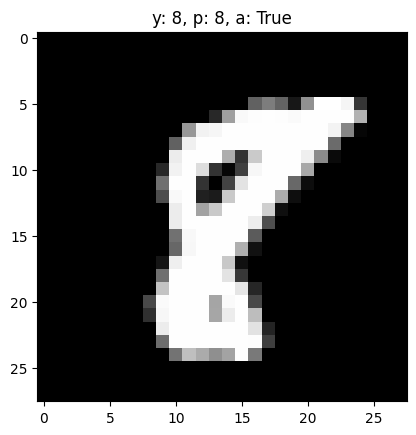

In [14]:
i = random.randint(0, len(x_train) - 1)


pred = model.predict(x_train[i-1:i]) # logit
print(pred)
pred = tf.nn.softmax(pred)
print(pred)
pred = np.argmax(pred)

prob_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

xxx = x_train[i-1:i]
print(f"prob: {prob_model(xxx)}")

plt.imshow(x_train[i], cmap="gray")
plt.title(f"y: {y_train[i]}, p: {pred}, a: {y_train[i] == pred}")
plt.show()

In [16]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])
probability_model(x_test[:1])

model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.0721 - accuracy: 0.9773


[0.0720677301287651, 0.9772999882698059]